#### 31.01.2026
# Projekt zaliczeniowy (PRIAD) 

### Autorzy:
- Olaf Naruszko
- Maciej Magnuszewski

### Zbiór danych: E-Commerce Sales Dataset

https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

Zbiór danych przedstawia szczegółową analizę rentowności sprzedaży e-commerce. Zawiera informacje o sprzedaży, a także dane finansowe dotyczące kosztów, przychodów i zysków. Dane obejmują szczegóły produktowe (SKU, numery modeli, stany magazynowe, kategorie, rozmiary, kolory) oraz ceny detaliczne na platformach sprzedażowych, takich jak Amazon. Dodatkowo uwzględnia on informacje transakcyjne, m.in. datę sprzedaży, ilość, walutę, kwotę brutto, kwotę zapłaconą przez klienta, sposób realizacji zamówienia oraz status B2B/B2C. Zbiór danych umożliwia analizę efektywności kanałów sprzedaży oraz ocenę rentowności produktów w handlu internetowym.

Zadania do wykonania:
1. **Analizę aksploracyjna (statystyki opisowe, korelacje):**
kompletność, odchylenia standardowe, średnie, korelacje.  
2. **Wizualizacja:**
Box ploty, histogramy, scatter ploty (wszystkie pary atrybutów) ,  
3. **Uczenie Maszynowe:**
Regresja przewidująca ceny: Linear Regression, SVM, DecisionTreeRegressor. 

## 1. Analiza eksploracyjna

Projekt rozpoczynamy od analizy eksploracyjnej, aby dokładnie poznać strukturę zbioru, zidentyfikować kluczowe atrybuty oraz poznać ogólną jakość dostarczonych danych. Wyniki analizy bedą stanowić podstawę do dalszych analiz i modelowania.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

df = pd.read_csv('Amazon Sale Report.csv')
print(f"Wymiary zbioru danych: {df.shape[0]} wierszy x {df.shape[1]} kolumn")

print("PIERWSZE 5 WIERSZY")
print(df.head())

print("PODSTAWOWE INFORMACJE O ZBIORZE")
print(df.info())

print("NAZWY KOLUMN")
print(df.columns.tolist())

print("TYPY DANYCH")
print(df.dtypes)

Wymiary zbioru danych: 128975 wierszy x 24 kolumn
PIERWSZE 5 WIERSZY
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amo

C:\Users\Olaf\AppData\Local\Temp\ipykernel_5124\1804203537.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


In [11]:
print("KONWERSJA TYPÓW DANYCH")

if 'Amount' in df.columns:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    print("Kolumna 'Amount' przekonwertowana na numeryczną")

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')
    print("Kolumna 'Date' przekonwertowana na datetime")

if 'Qty' in df.columns:
    df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
    print("Kolumna 'Qty' przekonwertowana na numeryczną")

if 'B2B' in df.columns:
    df['B2B'] = df['B2B'].map({'TRUE': True, 'FALSE': False, True: True, False: False})
    print("Kolumna 'B2B' przekonwertowana na boolean")

print("\nTypy danych po konwersji:")
print(df.dtypes)

KONWERSJA TYPÓW DANYCH
Kolumna 'Amount' przekonwertowana na numeryczną
Kolumna 'Date' przekonwertowana na datetime
Kolumna 'Qty' przekonwertowana na numeryczną
Kolumna 'B2B' przekonwertowana na boolean

Typy danych po konwersji:
index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 o

W celu zapewnienia poprawnych dalszych obliczeń przekonwertowaliśmy niektóre kolumny na odpowiednie typym aby móc w pełni wykorzystać ich potencjał.

ANALIZA KOMPLETNOŚCI DANYCH
Liczba wierszy w zbiorze: 128,975

LICZBA KLAS (kolumna 'Status'):
Liczba unikalnych klas: 13

LICZBA OBIEKTÓW W KAŻDEJ KLASIE:
Status
Cancelled                        18332
Pending                            658
Pending - Waiting for Pick Up      281
Shipped                          77804
Shipped - Damaged                    1
Shipped - Delivered to Buyer     28769
Shipped - Lost in Transit            5
Shipped - Out for Delivery          35
Shipped - Picked Up                973
Shipped - Rejected by Buyer         11
Shipped - Returned to Seller      1953
Shipped - Returning to Seller      145
Shipping                             8
Name: count, dtype: int64

Procent w każdej klasie:
Status
Cancelled                        14.21
Pending                           0.51
Pending - Waiting for Pick Up     0.22
Shipped                          60.32
Shipped - Damaged                 0.00
Shipped - Delivered to Buyer     22.31
Shipped - Lost in Transit         0.0

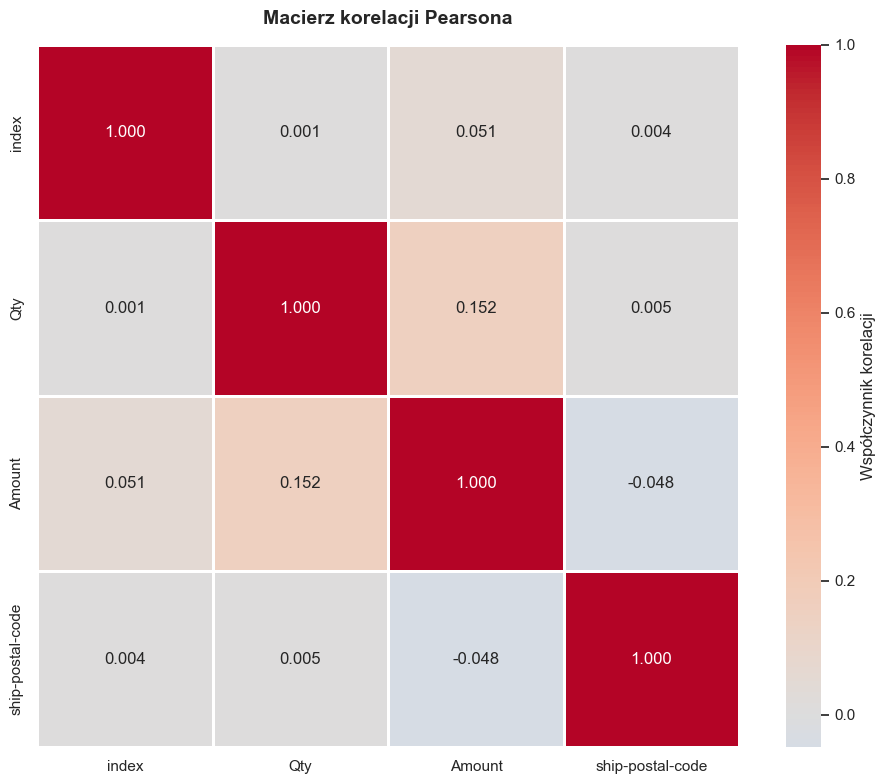


10 NAJSILNIEJSZYCH KORELACJI:
Para zmiennych                                           Korelacja
Qty     - Amount                      0.1518
index   - Amount                      0.0508
Amount  - ship-postal-code           -0.0480
Qty     - ship-postal-code            0.0054
index   - ship-postal-code            0.0045
index   - Qty                         0.0013

PODSUMOWANIE PODSTAWOWYCH METRYK:
Liczba obiektów (po czyszczeniu): 113,701
Liczba klas: 13
Liczba atrybutów: 22
Brakujące dane: 0 (po czyszczeniu)
Usuniętych wierszy: 15,274 (11.84%)


In [12]:
print("ANALIZA KOMPLETNOŚCI DANYCH")

# liczba obserwacji w zbiorze
total_objects = len(df)
print(f"Liczba wierszy w zbiorze: {total_objects:,}")

# zmienna traktowana jako klasa / etykieta
target_column = 'Status'

# analiza rozkładu klas
if target_column in df.columns:
    num_classes = df[target_column].nunique()
    print(f"\nLICZBA KLAS (kolumna '{target_column}'):")
    print(f"Liczba unikalnych klas: {num_classes}")

    print(f"\nLICZBA OBIEKTÓW W KAŻDEJ KLASIE:")
    class_counts = df[target_column].value_counts().sort_index()
    print(class_counts)
    
    print("\nProcent w każdej klasie:")
    class_percent = (df[target_column].value_counts(normalize=True) * 100).sort_index()
    print(class_percent.round(2))
else:
    print(f"\nKolumna '{target_column}' nie istnieje w zbiorze danych")
    print("Przykładowe kolumny kategoryczne:")
    print(df.select_dtypes(include='object').columns.tolist()[:10])

# liczba atrybutów w zbiorze
num_attributes = df.shape[1]
print(f"\nLICZBA ATRYBUTÓW/CECH:")
print(f"Liczba kolumn: {num_attributes}")

# globalna analiza braków danych
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
missing_percent = (total_missing / total_cells) * 100

print(f"\nLICZBA BRAKUJĄCYCH DANYCH:")
print(f"Całkowita liczba brakujących wartości: {total_missing:,}")
print(f"Procent brakujących danych: {missing_percent:.2f}%")
print(f"Kompletnych komórek: {total_cells - total_missing:,} / {total_cells:,}")

# braki danych w podziale na kolumny
print(f"\nBRAKUJĄCE WARTOŚCI PO KOLUMNACH:")
missing_by_column = df.isnull().sum()
missing_by_column = missing_by_column[missing_by_column > 0].sort_values(ascending=False)

if len(missing_by_column) > 0:
    print("\nKolumny z brakującymi wartościami:")
    for col, count in missing_by_column.items():
        percent = (count / len(df)) * 100
        print(f"  {col:30s}: {count:6,} ({percent:5.2f}%)")
else:
    print("Brak brakujących wartości w żadnej kolumnie")


print("\nCZYSZCZENIE DANYCH")

original_rows = len(df)

# usunięcie kolumn technicznych które nie wnoszą żadnych informacji
if 'Unnamed: 22' in df.columns:
    df = df.drop(columns=['Unnamed: 22'])
    print("Usunięto kolumnę 'Unnamed: 22'")

if 'fulfilled-by' in df.columns:
    df = df.drop(columns=['fulfilled-by'])
    print("Usunięto kolumnę 'fulfilled-by'")

# eliminacja transakcji bez sensu biznesowego
rows_before = len(df)
df = df[df['Qty'] > 0]
print(f"Usunięto {rows_before - len(df):,} wierszy z Qty = 0")

rows_before = len(df)
df = df[df['Amount'] > 0]
print(f"Usunięto {rows_before - len(df):,} wierszy z Amount = 0")

# usunięcie obserwacji bez kluczowych informacji finansowych
rows_before = len(df)
df = df.dropna(subset=['Amount', 'currency'])
print(f"Usunięto {rows_before - len(df):,} wierszy z brakami w Amount/currency")

# zamiana braków w wybranych kolumnach na wartości domyślne
cols_to_fill = {
    'promotion-ids': 'No Promotion',
    'Courier Status': 'Not Available',
    'ship-postal-code': 0,
    'ship-state': 'Unknown',
    'ship-city': 'Unknown',
    'ship-country': 'IN'
}

for col, fill_value in cols_to_fill.items():
    if col in df.columns:
        filled_count = df[col].isnull().sum()
        if filled_count > 0:
            df[col] = df[col].fillna(fill_value)
            print(f"Uzupełniono {filled_count:,} braków w '{col}'")

# kontrola braków w kolumnach krytycznych
critical_cols = ['Status', 'Qty']
rows_before = len(df)
df = df.dropna(subset=critical_cols)
print(f"Usunięto {rows_before - len(df):,} wierszy z brakami w kolumnach krytycznych")

# podsumowanie czyszczenia
new_rows = len(df)
removed_rows = original_rows - new_rows
removed_percent = (removed_rows / original_rows) * 100

print(f"\nLiczba wierszy przed czyszczeniem: {original_rows:,}")
print(f"Liczba wierszy po czyszczeniu: {new_rows:,}")
print(f"Usuniętych wierszy: {removed_rows:,} ({removed_percent:.2f}%)")

remaining_missing = df.isnull().sum().sum()
print(f"Pozostałe brakujące wartości: {remaining_missing}")

if remaining_missing == 0:
    print("Wszystkie brakujące wartości zostały obsłużone.")


print("\nŚREDNIE I ODCHYLENIA STANDARDOWE")

# identyfikacja zmiennych numerycznych
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    print(f"\nZmienne numeryczne ({len(numeric_cols)}):")
    print(numeric_cols)
    
    print("\nSTATYSTYKI OPISOWE:")
    stats_table = pd.DataFrame({
        'Średnia': df[numeric_cols].mean(),
        'Odchylenie std': df[numeric_cols].std(),
        'Mediana': df[numeric_cols].median(),
        'Min': df[numeric_cols].min(),
        'Max': df[numeric_cols].max()
    })
    print(stats_table)
else:
    print("\nBrak zmiennych numerycznych w zbiorze danych")


print("\nKORELACJE MIĘDZY ZMIENNYMI NUMERYCZNYMI")

# analiza zależności liniowych
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    
    print("\nMACIERZ KORELACJI (Pearson):")
    print(correlation_matrix)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt='.3f',
        linewidths=1,
        square=True,
        cbar_kws={'label': 'Współczynnik korelacji'}
    )
    plt.title('Macierz korelacji Pearsona', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()
    
    print("\n10 NAJSILNIEJSZYCH KORELACJI:")
    
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))
    
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
    
    print(f"{'Para zmiennych':<55} {'Korelacja':>10}")
    for col1, col2, corr in corr_pairs_sorted[:10]:
        print(f"{col1:7s} - {col2:25s}  {corr:7.4f}")
elif len(numeric_cols) == 1:
    print(f"\nTylko jedna zmienna numeryczna ({numeric_cols[0]}) – korelacja niemożliwa")
else:
    print("\nBrak zmiennych numerycznych – pominięto analizę korelacji")


print("\nPODSUMOWANIE PODSTAWOWYCH METRYK:")

print(f"Liczba obiektów (po czyszczeniu): {len(df):,}")
print(f"Liczba klas: {num_classes if target_column in df.columns else 'N/A'}")
print(f"Liczba atrybutów: {df.shape[1]}")
print(f"Brakujące dane: {df.isnull().sum().sum()} (po czyszczeniu)")
print(f"Usuniętych wierszy: {removed_rows:,} ({removed_percent:.2f}%)")

Zbiór składa się z ponad 128tys. obserwacji, co wskazuje na dużą skalę danych sprzedażowych. 

Atrybut Status jest silnie niezrównoważony – zdecydowaną większość stanowią zamówienia ze statusem "Shipped" (60,32%) oraz "Shipped - Delivered to Buyer" (22,31%). Pozostałe 11 klas reprezentuje łącznie mniej niż 18% obserwacji, przy czym niektóre kategorie (np. "Shipped - Damaged", "Shipped - Lost in Transit") występują sporadycznie.

W oryginalnym zbiorze łączny udział brakujących danych wynosił 6,8%, jednak ich rozkład był skrajnie nierównomierny. Największy odsetek braków występował w kolumnach "fulfilled-by" (69,55%) oraz "promotion-ids" (38,11%). W procesie czyszczenia zastosowaliśmy hybrydowe podejście: Usuneliśmy kolumnę "fulfilled-by" z powodu nadmiernej liczby braków (69,55%) i ograniczonej wartości analitycznej, Usuneliśmy wiersze z anomaliami: 12 807 rekordów z Qty = 0 oraz 2 343 rekordów z Amount = 0, które stanowiły błędne lub podejrzane transakcje, a pozostałe braki w kolumnach niekrytycznych uzupełniliśmy wartościami domyślnymi

Finalnie usunęliśmy 15 150 wierszy (11,75% zbioru), zachowując 113 825 obserwacji wysokiej jakości bez anomalii i braków danych.

Analiza statystyk opisowych pokazuje, że atrybut Qty jest niemal stały (mediana = 1, średnia = 1), co wskazuje, że pojedyncze zakupy dominują w zbiorze. Po czyszczeniu wartość minimalna Qty wynosi 1, a maksymalna 15, przy czym atrybut Amount ma zakres od 199 do 5584, co sugeruje dużą różnorodność produktów cenowo.

Macierz korelacji pokazuje brak silnych zależności liniowych pomiędzy atrybutami numerycznymi. Najsilniejsza zaobserwowana korelacja między Qty a Amount (r = 0,12) jest słaba, co sugeruje, że wartość transakcji w ograniczonym stopniu zależy od liczby zamawianych sztuk. Może to wynikać z różnorodności produktów o zróżnicowanych cenach jednostkowych.

Podsumowując całą analizę eksploracyjną, zbiór po czyszczeniu jest wysokiej jakości, zawiera 113 825 kompletnych obserwacji bez braków i anomalii.

## 2. Wizualizacje

C:\Users\Olaf\AppData\Local\Temp\ipykernel_5124\715750050.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Amount', y='Category', palette='Set3', showfliers=False)


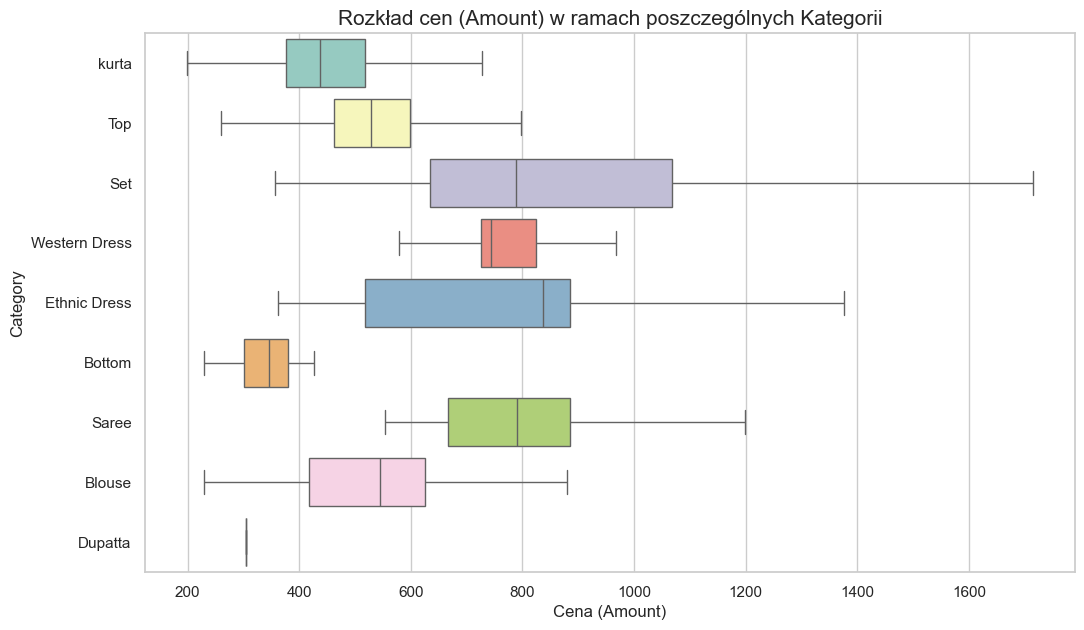

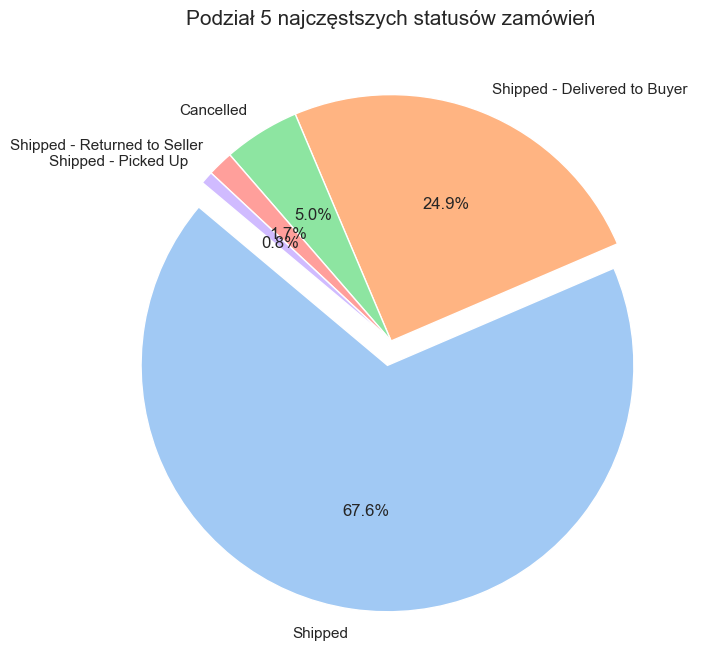

C:\Users\Olaf\AppData\Local\Temp\ipykernel_5124\715750050.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_table.index, y=pivot_table.values, palette='coolwarm')


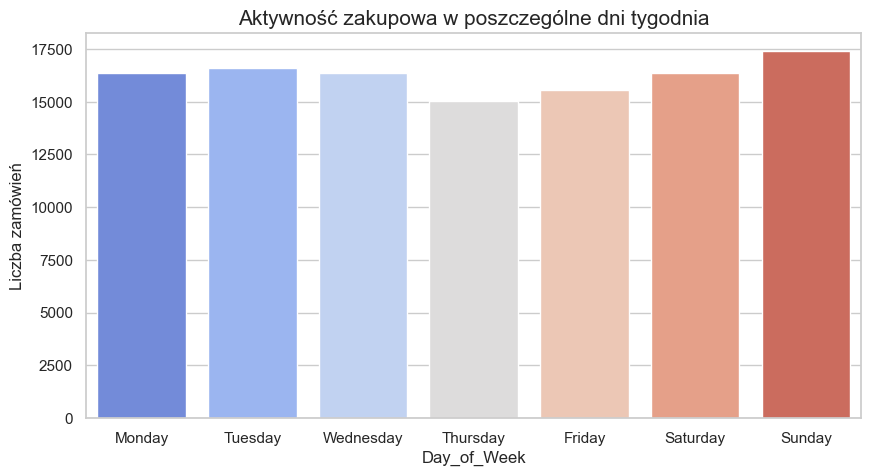

In [17]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

if 'Category' in df.columns and 'Amount' in df.columns:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x='Amount', y='Category', palette='Set3', showfliers=False) 
    plt.title('Rozkład cen (Amount) w ramach poszczególnych Kategorii', fontsize=15)
    plt.xlabel('Cena (Amount)')
    plt.show()

if 'Status' in df.columns:
    status_counts = df['Status'].value_counts().head(5) 
    plt.figure(figsize=(8, 8))
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('pastel'), startangle=140, explode=[0.1 if i==0 else 0 for i in range(len(status_counts))])
    plt.title('Podział 5 najczęstszych statusów zamówień', fontsize=15)
    plt.show()

if 'Date' in df.columns:
    df['Day_of_Week'] = df['Date'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    pivot_table = df.groupby('Day_of_Week')['Amount'].count().reindex(day_order)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=pivot_table.index, y=pivot_table.values, palette='coolwarm')
    plt.title('Aktywność zakupowa w poszczególne dni tygodnia', fontsize=15)
    plt.ylabel('Liczba zamówień')
    plt.show()

Wykres pudełkowy rozkładu cen ujawnia że kategoria Set oraz Ethnic Dress cechują się największą rozpiętością cenową co wskazuje na posiadanie w ofercie zarówno produktów tanich jak i modeli premium. W kategorii Set ceny produktów sięgają nawet poziomu 1700 jednostek co jest najwyższym wynikiem w całym zestawieniu. Western Dress posiada bardzo wąskie pudełko skupione w okolicy 800 co sugeruje niemal stałą cenę dla tej grupy towarowej. Najtańszą kategorią jest Bottom gdzie większość cen oscyluje w granicach 400 jednostek a najniższą zmienność wykazuje Dupatta będąca pojedynczym punktem cenowym.

Wykres kołowy prezentuje strukturę statusów zamówień gdzie zdecydowana większość to paczki wysłane stanowiące 67,6 procent całości. Zamówienia dostarczone do klienta to kolejne 24,9 procent co świadczy o wysokiej skuteczności operacyjnej. Rezygnacje czyli status Cancelled wynoszą dokładnie 5 procent wszystkich przypadków w wybranym zestawieniu. Problemy z dostawami takie jak zwroty do sprzedawcy oraz statusy Picked Up to zaledwie 1,7 procent oraz 0,8 procent co potwierdza ogólną sprawność procesów logistycznych.

Z wykresu aktywności zakupowej w tygodniu wynika że niedziela jest dniem o najwyższym natężeniu ruchu osiągającym wynik około 17500 zamówień. Poniedziałek oraz wtorek również charakteryzują się bardzo wysoką sprzedażą przekraczającą 16000 transakcji dziennie. Najmniejszą aktywność klientów widać w czwartki i piątki gdy liczba zamówień spada do najniższego poziomu w okolicy 15000. Sobota stanowi moment ponownego odbicia sprzedaży i przygotowania pod niedzielny szczyt zakupowy.

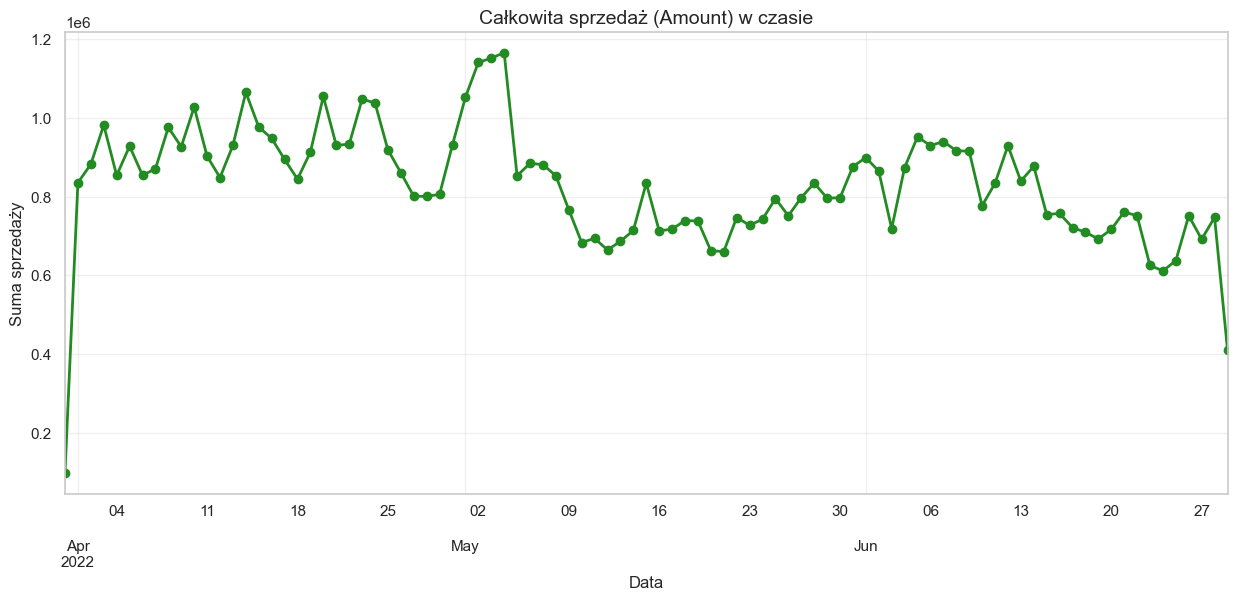

C:\Users\Olaf\AppData\Local\Temp\ipykernel_5124\169251377.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')


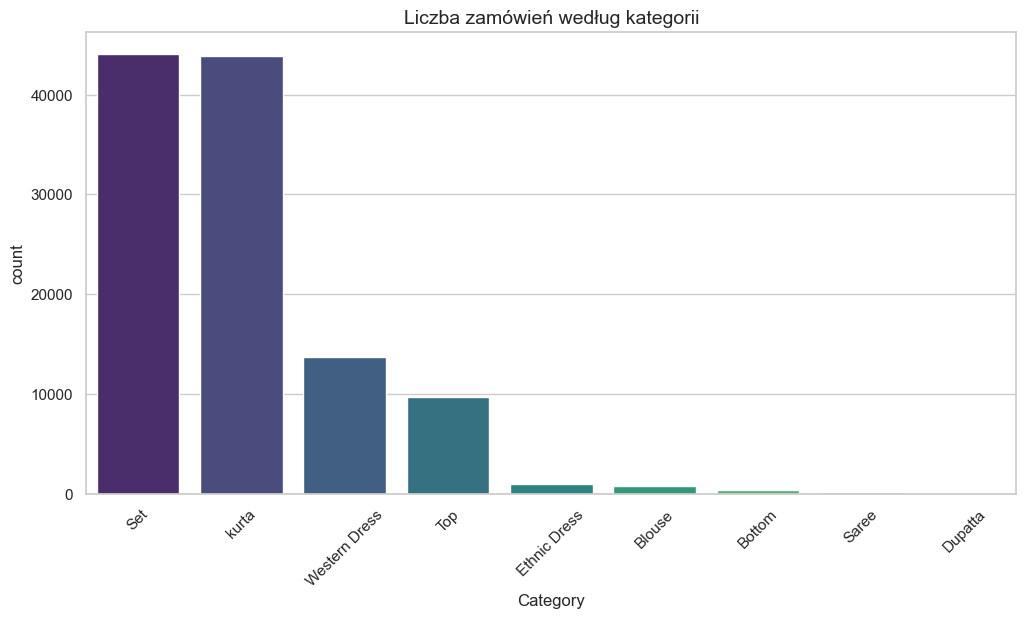

C:\Users\Olaf\AppData\Local\Temp\ipykernel_5124\169251377.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Size', order=df['Size'].value_counts().index, palette='magma')


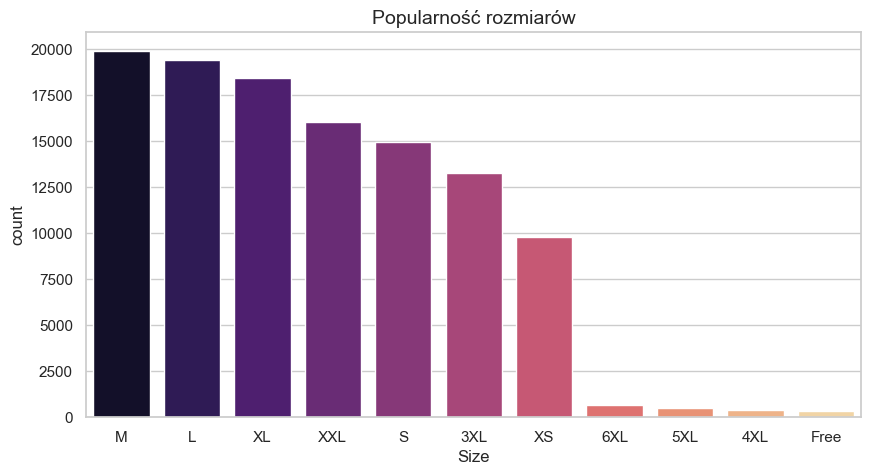

C:\Users\Olaf\AppData\Local\Temp\ipykernel_5124\169251377.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='cool')


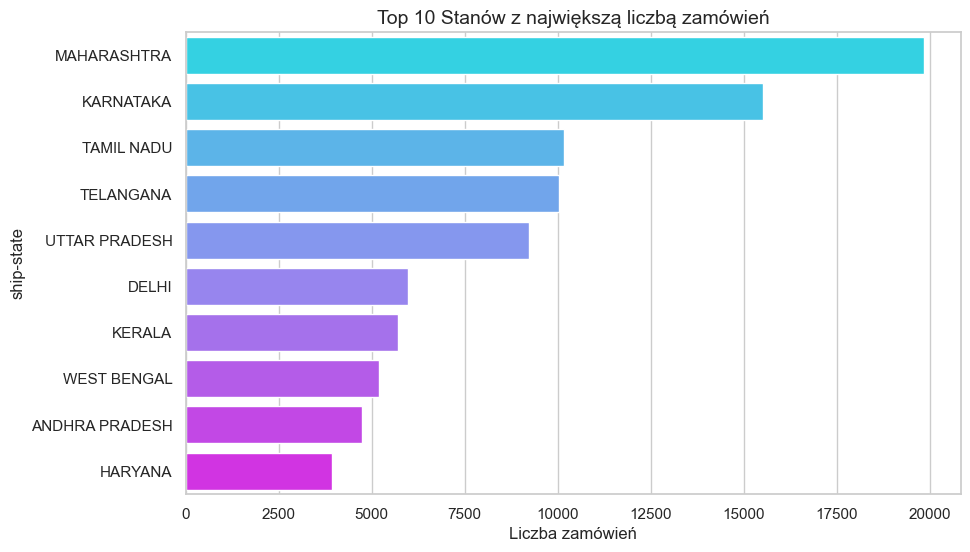

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

daily_sales = df.groupby('Date')['Amount'].sum()

plt.figure(figsize=(15, 6))
daily_sales.plot(kind='line', marker='o', color='forestgreen', linewidth=2)
plt.title('Całkowita sprzedaż (Amount) w czasie', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Suma sprzedaży')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title('Liczba zamówień według kategorii', fontsize=14)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Size', order=df['Size'].value_counts().index, palette='magma')
plt.title('Popularność rozmiarów', fontsize=14)
plt.show()

top_states = df['ship-state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='cool')
plt.title('Top 10 Stanów z największą liczbą zamówień', fontsize=14)
plt.xlabel('Liczba zamówień')
plt.show()

Główne trendy produktowe i geograficzne W kategorii produktów bezsprzecznie rządzą Set oraz kurta, które generują największą liczbę zamówień w całym zbiorze. Kategorie takie jak Saree czy Blouse to margines całej sprzedaży. Jeśli chodzi o rozmiarówkę, to najwięcej schodzi ubrań w rozmiarach L, M oraz XL. Rozmiary bardzo duże (4XL, 5XL) to rzadkość, co pokazuje, że grupa docelowa mieści się w standardowej sylwetce. Geograficznie najsilniejszym regionem jest stan Maharashtra, który zostawia konkurencję daleko w tyle pod względem liczby paczek.

Czasowa analiza sprzedaży Wykres liniowy pokazujący sumę sprzedaży w czasie ujawnia, że dane obejmują okres od maja do czerwca 2022 roku. Widać tutaj bardzo wyraźny pik sprzedażowy w połowie maja, gdzie suma dzienna mocno wystrzeliła w górę. Po tym okresie w czerwcu widać trend spadkowy i stabilizację na niższym poziomie, co może sugerować koniec jakiejś dużej akcji promocyjnej lub sezonowość oferowanych produktów.

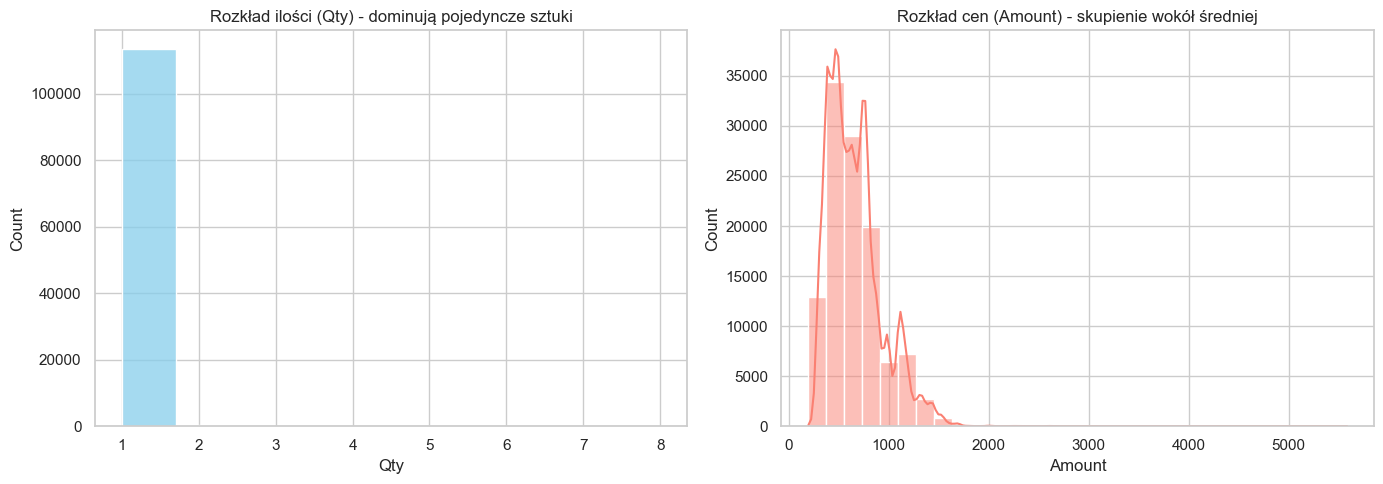

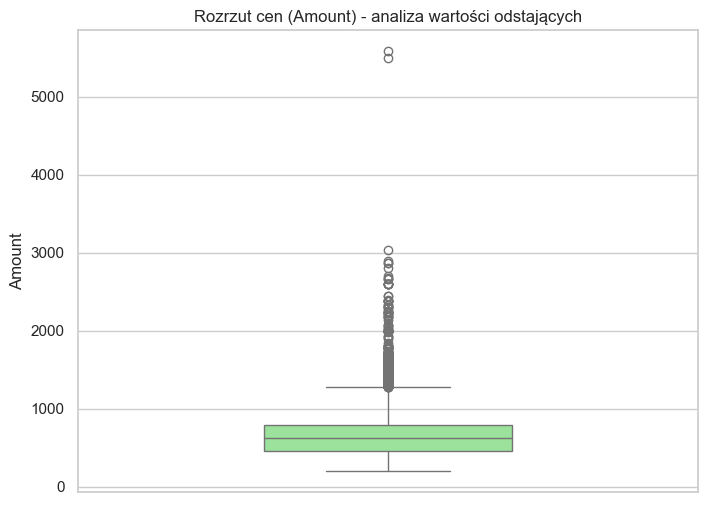

C:\Users\Olaf\AppData\Local\Temp\ipykernel_5124\703018178.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Amount', data=df_sub, palette='Set3')


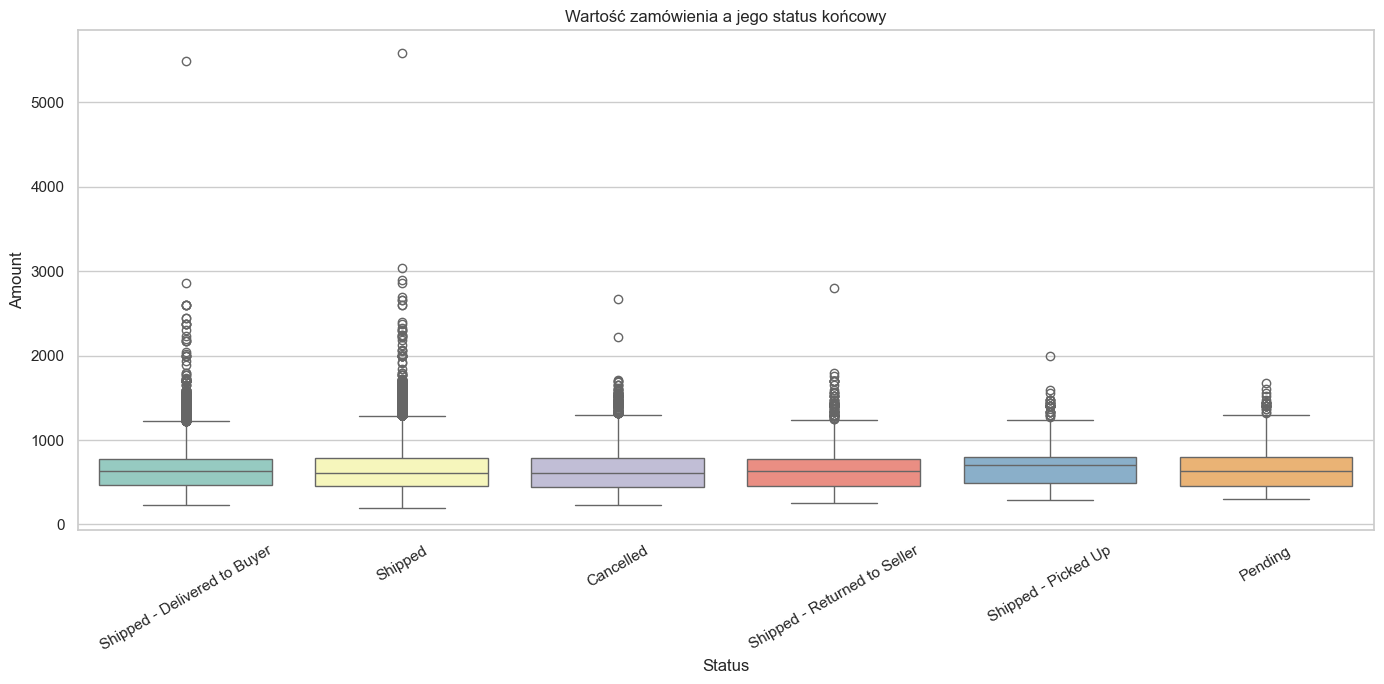

Tworzę macierz dla par: ['Qty', 'Amount', 'ship-postal-code']


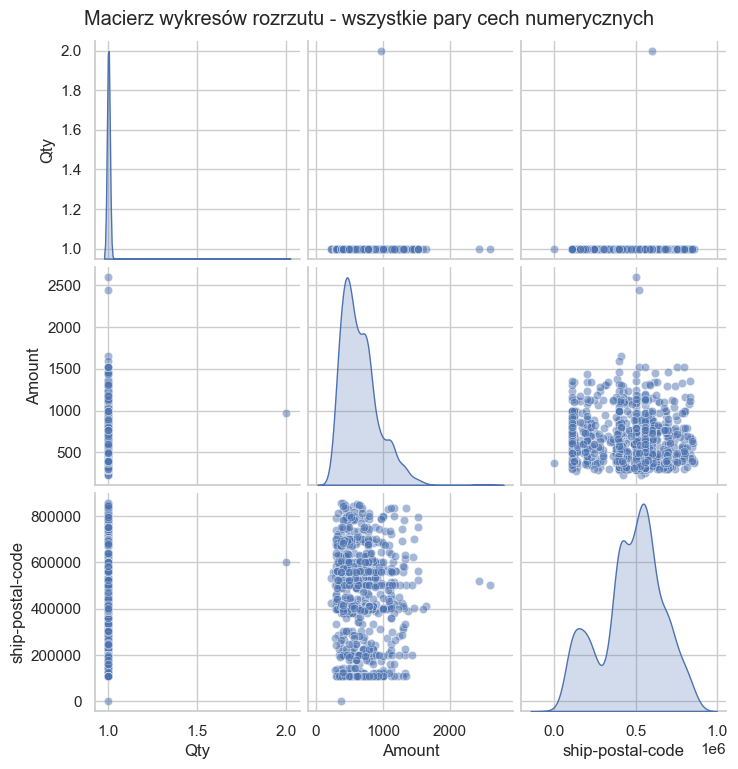

In [19]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Qty'], bins=10, ax=axes[0], color='skyblue', kde=False)
axes[0].set_title('Rozkład ilości (Qty) - dominują pojedyncze sztuki')

sns.histplot(df['Amount'], bins=30, ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Rozkład cen (Amount) - skupienie wokół średniej')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Amount'], color='lightgreen', width=0.4)
plt.title('Rozrzut cen (Amount) - analiza wartości odstających')
plt.show()


if 'Status' in df.columns:
    plt.figure(figsize=(14, 7))
    top_statusy = df['Status'].value_counts().nlargest(6).index
    df_sub = df[df['Status'].isin(top_statusy)]

    sns.boxplot(x='Status', y='Amount', data=df_sub, palette='Set3')
    plt.xticks(rotation=30)
    plt.title('Wartość zamówienia a jego status końcowy')
    plt.tight_layout()
    plt.show()


numeryczne = df.select_dtypes(include=[np.number]).columns.tolist()
numeryczne = [c for c in numeryczne if c not in ['index', 'Unnamed: 0']]

print(f"Tworzę macierz dla par: {numeryczne}")

sns.pairplot(df[numeryczne].sample(min(1000, len(df))), diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Macierz wykresów rozrzutu - wszystkie pary cech numerycznych', y=1.02)
plt.show()

Rozkład zmiennych i analiza wartości odstających Wykresy słupkowe i pudełkowe pozwalają szybko ogarnąć skalę danych w tym zbiorze. Zmienna Qty pokazuje, że niemal wszystkie rekordy to zakupy pojedynczych sztuk towaru. Jeśli chodzi o kwoty (Amount), to większość transakcji zamyka się w przedziale od 500 do 800. Wykres pudełkowy ceny pokazuje medianę w okolicach 700 oraz całą masę wartości odstających, które sięgają powyżej 1500, a nawet 2500.

Wartość zamówienia a status końcowy Zestawienie ceny ze statusem zamówienia ujawnia bardzo ważną rzecz: rozkład cen dla produktów dostarczonych (Delivered) i zwróconych (Returned) jest niemal identyczny. Pokazuje to, że droższe przedmioty wcale nie są zwracane częściej niż te tańsze. Jedynie przy statusie Rejected by Buyer widać nieco szerszy rozstęp, co może sugerować większą niepewność klientów przy droższych zakupach.

Relacje w macierzy punktowej (Pairplot) Macierz wykresów rozrzutu potwierdza, że między danymi nie ma prostych zależności liniowych. Kropki przy kodach pocztowych tworzą pionowe i poziome pasy, co jest typowe, gdy traktujemy kody jak zwykłe liczby, mimo że nimi nie są. Widać też, że wyższe ilości (Qty) nie zawsze oznaczają rekordowe kwoty, co sugeruje, że w zbiorze są produkty o bardzo różnej rozpiętości cenowej

C:\Users\Olaf\AppData\Local\Temp\ipykernel_5124\1533672750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')
C:\Users\Olaf\AppData\Local\Temp\ipykernel_5124\1533672750.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue.values, y=city_revenue.index, palette='magma')


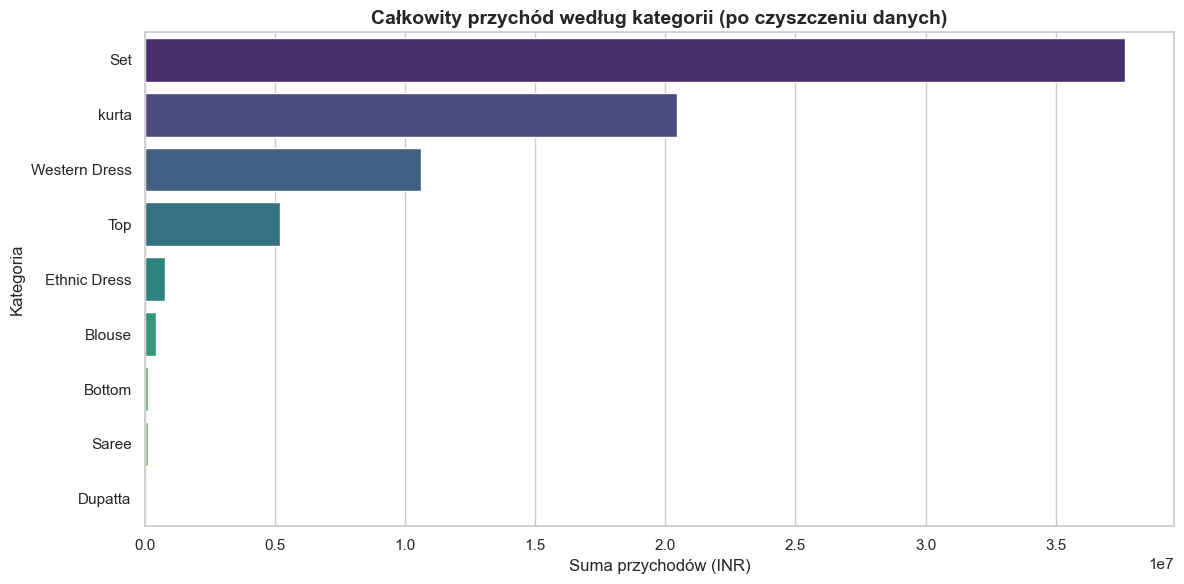

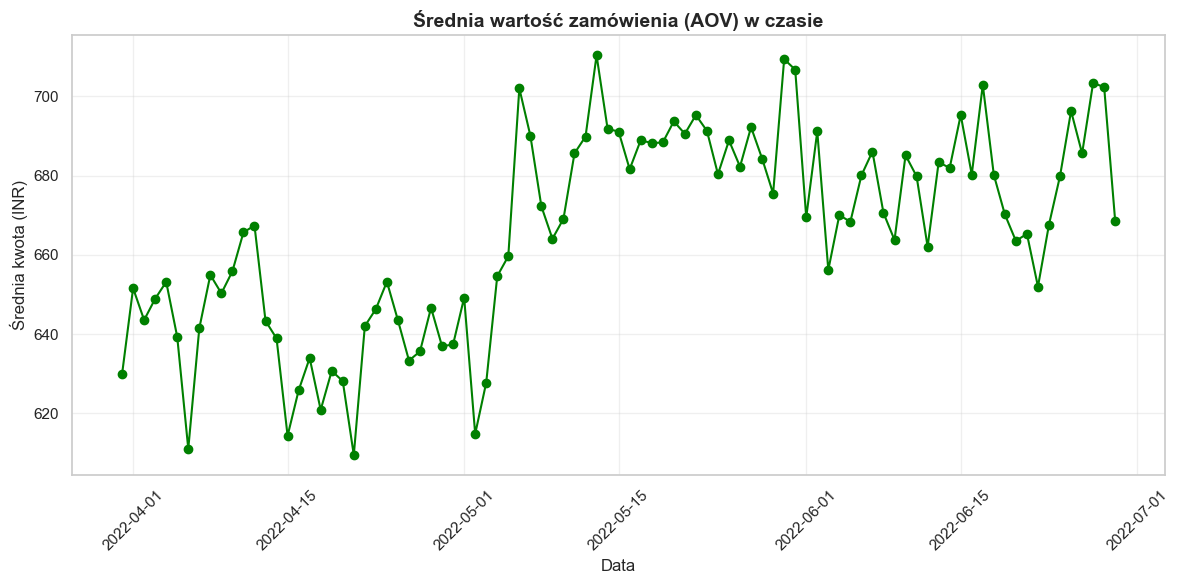

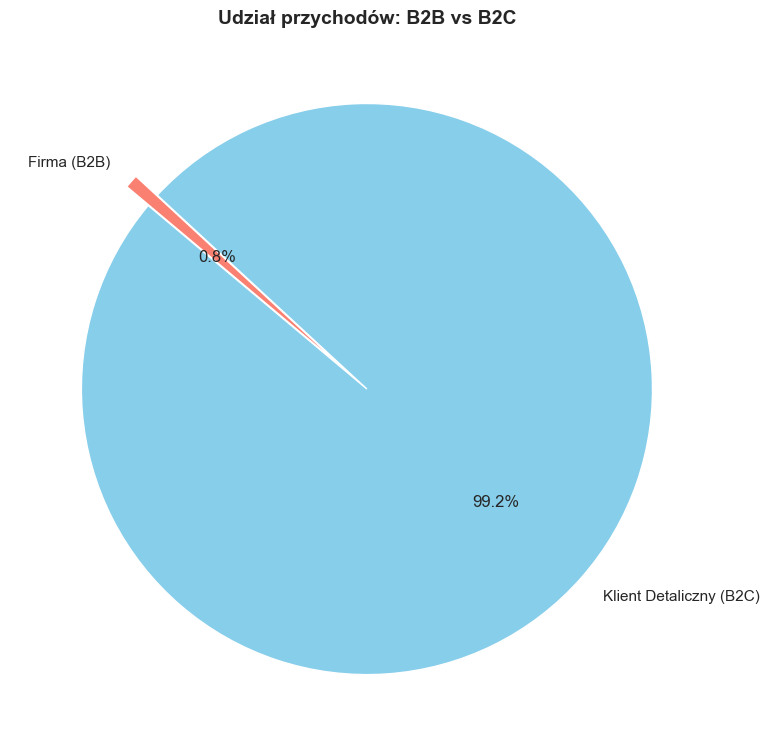

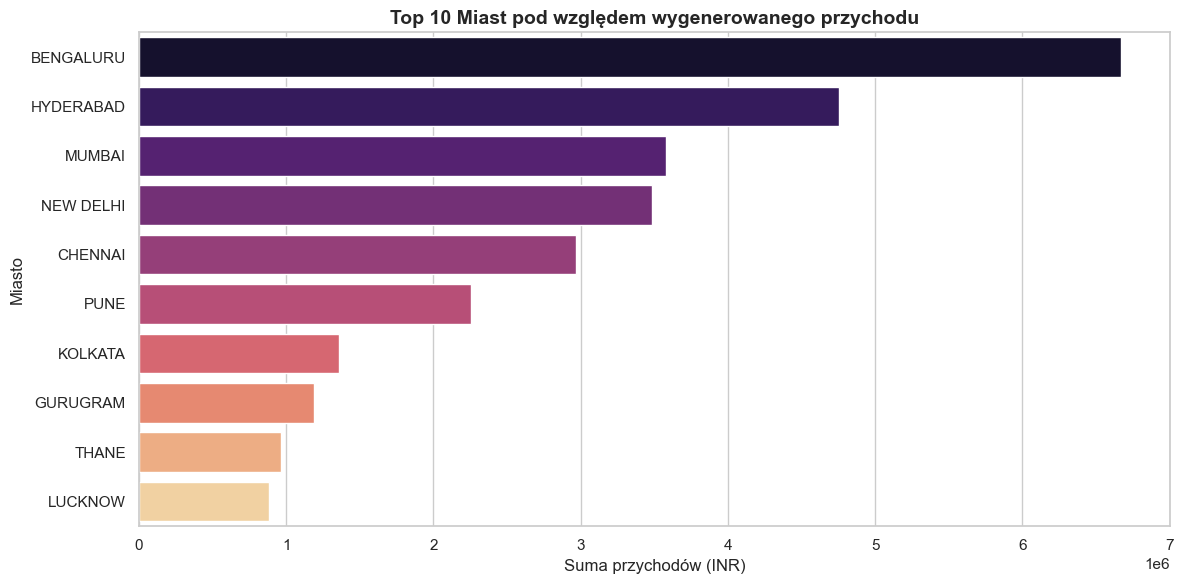

In [20]:
plt.figure(figsize=(12, 6))
category_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')
plt.title('Całkowity przychód według kategorii (po czyszczeniu danych)', fontsize=14, fontweight='bold')
plt.xlabel('Suma przychodów (INR)')
plt.ylabel('Kategoria')
plt.tight_layout()


plt.figure(figsize=(12, 6))
aov_trend = df.groupby('Date')['Amount'].mean()
plt.plot(aov_trend.index, aov_trend.values, marker='o', color='green', linestyle='-')
plt.title('Średnia wartość zamówienia (AOV) w czasie', fontsize=14, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Średnia kwota (INR)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()


plt.figure(figsize=(8, 8))
b2b_revenue = df.groupby('B2B')['Amount'].sum()
labels = ['Klient Detaliczny (B2C)', 'Firma (B2B)']
colors = ['skyblue', 'salmon']
plt.pie(b2b_revenue, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Udział przychodów: B2B vs B2C', fontsize=14, fontweight='bold')
plt.tight_layout()


plt.figure(figsize=(12, 6))
city_revenue = df.groupby('ship-city')['Amount'].sum().nlargest(10).sort_values(ascending=False)
sns.barplot(x=city_revenue.values, y=city_revenue.index, palette='magma')
plt.title('Top 10 Miast pod względem wygenerowanego przychodu', fontsize=14, fontweight='bold')
plt.xlabel('Suma przychodów (INR)')
plt.ylabel('Miasto')
plt.tight_layout()

Finansowe wyniki kategorii i miast Jeśli spojrzymy na kasę, to w kategorii produktów bezsprzecznie rządzą Set oraz kurta. To one generują największy przychód w całym zbiorze – kategoria Set zarobiła ponad 37 mln INR, a kurta ponad 20 mln INR, co w praktyce napędza ten biznes. Geograficznie najwięcej pieniędzy płynie z Bengaluru, który pod względem wygenerowanego przychodu zostawia resztę miast, takich jak Hyderabad czy Mumbai, wyraźnie z tyłu.

Udziały rynkowe i średnia wartość zamówienia (AOV) Podział przychodów nie zostawia złudzeń co do tego, kto tu kupuje - aż 99,2% wpływów to sprzedaż detaliczna (B2C), a firmy stanowią zaledwie ułamek procenta całości. Analizując średnią wartość zamówienia (AOV) w czasie, widać spore wahania, ale przeważnie kwota ta trzyma się stabilnie w przedziale 620–700 INR. Tutaj również widać wyraźny skok w połowie maja, kiedy średnia wartość koszyka była najwyższa w całym badanym okresie.

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# kopia danych, zeby nie ruszac oryginalu
df_features = df.copy()

# czyszczenie nazw kolumn (spacje)
df_features.columns = df_features.columns.str.strip()

# informacja czy byla promocja
df_features['has_promotion'] = (df_features['promotion-ids'] != 'No Promotion').astype(int)

# cechy czasowe
df_features['order_month'] = df_features['Date'].dt.month
df_features['order_day_of_week'] = df_features['Date'].dt.dayofweek
df_features['order_quarter'] = df_features['Date'].dt.quarter
df_features['is_weekend'] = (df_features['order_day_of_week'] >= 5).astype(int)

# b2b jako 0/1
df_features['B2B_numeric'] = df_features['B2B'].astype(int)

# interakcja ilosci i typu klienta
df_features['qty_x_b2b'] = df_features['Qty'] * df_features['B2B_numeric']

# cechy uzywane w modelu
feature_cols = [
    'Qty',
    'B2B_numeric',
    'has_promotion',
    'order_month',
    'order_day_of_week',
    'order_quarter',
    'is_weekend',
    'qty_x_b2b',
    'Category',
    'Size',
    'Style',
    'Fulfilment',
    'ship-service-level',
    'ship-state',
    'currency',
    'Sales Channel'
]

print(f"Wybrane cechy ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"{i}. {col}")
print()

# X i y
X = df_features[feature_cols].copy()
y = df_features['Amount']

# one hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)
print(f"Liczba cech po kodowaniu: {X_encoded.shape[1]}\n")

# podzial train/test po produkcie (Style)
groups = df_features['Style']

gss = GroupShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)

train_idx, test_idx = next(gss.split(X_encoded, y, groups=groups))

X_train = X_encoded.iloc[train_idx]
X_test = X_encoded.iloc[test_idx]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]

print("Zastosowano podzial po produkcie (Style)")
print(f"Train: {X_train.shape[0]:,}")
print(f"Test: {X_test.shape[0]:,}\n")

# standaryzacja (tylko na train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dane wystandaryzowane\n")
print("Trenowanie modeli\n")

# linear regression
print("1. Linear Regression")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"MAE = {lr_mae:.2f} INR")
print(f"RMSE = {lr_rmse:.2f} INR")
print(f"R2 = {lr_r2:.3f}\n")

print("2. Support Vector Regression")
SVR_MAX_SAMPLES = 10000 # maksymalna liczba próbek do trenowania SVR

if X_train_scaled.shape[0] > SVR_MAX_SAMPLES:
    np.random.seed(42)
    idx = np.random.choice(
        X_train_scaled.shape[0],
        SVR_MAX_SAMPLES,
        replace=False
    )
    X_train_svr = X_train_scaled[idx]
    y_train_svr = y_train.iloc[idx]
else:
    X_train_svr = X_train_scaled
    y_train_svr = y_train

print(f"SVR trenowany na {X_train_svr.shape[0]:,} obserwacjach\n")
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_svr, y_train_svr)
y_pred_svr = svr.predict(X_test_scaled)

svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
svr_r2 = r2_score(y_test, y_pred_svr)

print(f"MAE = {svr_mae:.2f} INR")
print(f"RMSE = {svr_rmse:.2f} INR")
print(f"R2 = {svr_r2:.3f}\n")

# decision tree
print("3. Decision Tree Regressor")
dt = DecisionTreeRegressor(
    max_depth=20,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_r2 = r2_score(y_test, y_pred_dt)

print(f"MAE = {dt_mae:.2f} INR")
print(f"RMSE = {dt_rmse:.2f} INR")
print(f"R2 = {dt_r2:.3f}\n")

# porownanie modeli
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regression', 'Decision Tree Regressor'],
    'MAE': [lr_mae, svr_mae, dt_mae],
    'RMSE': [lr_rmse, svr_rmse, dt_rmse],
    'R2': [lr_r2, svr_r2, dt_r2]
})

results = results.sort_values('R2', ascending=False)

print("Porownanie modeli:")
print(results.to_string(index=False))

best = results.iloc[0]

print("\nNajlepszy model:")
print(f"Model: {best['Model']}")
print(f"R2: {best['R2']:.3f}")
print(f"RMSE: {best['RMSE']:.2f} INR")
print(f"MAE: {best['MAE']:.2f} INR")


Utworzono nowe cechy

Wybrane cechy (16):
1. Qty
2. B2B_numeric
3. has_promotion
4. order_month
5. order_day_of_week
6. order_quarter
7. is_weekend
8. qty_x_b2b
9. Category
10. Size
11. Style
12. Fulfilment
13. ship-service-level
14. ship-state
15. currency
16. Sales Channel

Liczba cech po kodowaniu: 1464

Zastosowano podzial po produkcie (Style)
Train: 91,987
Test: 21,714

Dane wystandaryzowane

Trenowanie modeli

1. Linear Regression
MAE = 131.35 INR
RMSE = 177.11 INR
R2 = 0.450

2. Support Vector Regression
SVR trenowany na 10,000 obserwacjach

MAE = 141.01 INR
RMSE = 184.73 INR
R2 = 0.402

3. Decision Tree Regressor
MAE = 126.96 INR
RMSE = 178.03 INR
R2 = 0.445

Porownanie modeli:
                    Model        MAE       RMSE       R2
        Linear Regression 131.347716 177.111808 0.450460
  Decision Tree Regressor 126.962794 178.030325 0.444745
Support Vector Regression 141.012203 184.728658 0.402177

Najlepszy model:
Model: Linear Regression
R2: 0.450
RMSE: 177.11 INR
MAE: 13

Wnioski

**Linear Regression**

– Najlepszy model w analizie (R2 = 0,45).

– Stabilne wyniki przy dużej liczbie cech po kodowaniu (1464).

– Najniższy RMSE spośród modeli, co oznacza najmniejsze duże błędy predykcji.

– Dobrze generalizuje na nowe produkty dzięki prostocie i liniowej strukturze.

– Wysoka interpretowalność – łatwa analiza wpływu poszczególnych cech na cenę.


**Decision Tree Regressor**

– Wyniki bardzo zbliżone do regresji liniowej (R2 = 0,44).

– Najniższa wartość MAE, co oznacza dobre przewidywanie „typowych” cen.

– Lepiej wychwytuje lokalne zależności i nieregularności w danych.

– Brak istotnej poprawy względem regresji liniowej przy większej złożoności modelu.

– Potencjalne ryzyko przeuczenia przy dalszym zwiększaniu głębokości drzewa.


**Support Vector Regression (SVR)**

– Najsłabszy model w zestawieniu (R2 = 0,40).

– Bardzo wysoki koszt obliczeniowy przy dużej liczbie cech kategorycznych.

– Wymagał ograniczenia liczby obserwacji do 10 000, co wpłynęło na jakość predykcji.

– Brak przewagi nad prostszymi modelami mimo zastosowania nieliniowego kernela.

– Niska praktyczna użyteczność dla tego typu danych e-commerce.



Spośród trzech analizowanych modeli najlepsze rezultaty osiągnęła regresja liniowa, która okazała się najbardziej stabilnym i efektywnym rozwiązaniem dla badanego zbioru danych. Modele o większej złożoności, takie jak Decision Tree Regressor oraz Support Vector Regression, nie przyniosły istotnej poprawy jakości predykcji w porównaniu do prostszego modelu liniowego.

Brak wyraźnej przewagi modeli nieliniowych wskazuje, że zależności pomiędzy wykorzystanymi cechami a ceną zamówienia mają w dużej mierze charakter liniowy. Jednocześnie umiarkowane wartości współczynnika determinacji R2, sugerują, że istotna część zmienności ceny nie jest możliwa do wyjaśnienia na podstawie dostępnych danych. W szczególności brakuje informacji takich jak rzeczywista cena jednostkowa produktu, poziom rabatów procentowych, koszty dostawy czy indywidualna polityka cenowa sprzedawców.

Zastosowanie podziału danych z grupowaniem po produkcie zwiększyło wiarygodność uzyskanych wyników i potwierdziło zdolność modeli do generalizacji na nowe produkty. W kontekście praktycznym regresja liniowa stanowi najlepszy kompromis pomiędzy jakością predykcji, czasem obliczeń oraz interpretowalnością wyników, co czyni ją najbardziej odpowiednim modelem dla analizowanego problemu.